# Comparing the results of Bayesian Optimization and Genetic Algorithm on Hyperparameter Tuning of Decision Tree Regressor

### Dataset used is Kaggle's Advanced House Pricing Dataset `https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data`



-------------------------------------------------------------------------------------------------------------------------------------------------


## **Workflow**
 
### 1. Prediction using raw model 
### 2. Prediction using GridSearchCV
### 3. Prediction using bayesian optimized model
### 4. Predicition using Genetically optimized model
### 5. Pedicition using overfit model
### 6. Plotting feature importance of each model
### 7. Plotting the decision tree model


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("../data/AdvancedHousePrediction/train.csv")
test = pd.read_csv("../data/AdvancedHousePrediction/test.csv")

In [4]:
train.drop("Id" , inplace=True , axis=1)
test.drop("Id" , inplace=True , axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = train.select_dtypes(include=["object"]).columns.tolist()

for category in categorical_columns:

    train[category] = le.fit_transform(train[category])
    test[category] = le.fit_transform(test[category])


In [6]:
train["LotFrontage"].fillna(np.mean(train["LotFrontage"]) , inplace=True)

In [7]:
train.dropna(inplace=True)

In [8]:
X = train.iloc[: , :-1]
y = train.iloc[: , -1]

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42 )

### Fitting on raw model

In [10]:
max(X_train.isna().sum())

0

In [11]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,2,3,3,0,4,...,120,0,2,2,3,0,6,2010,8,4
1,20,3,81.0,14267,1,2,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,2,0,3,0,4,...,0,0,2,2,3,0,3,2010,8,4
3,60,3,78.0,9978,1,2,0,3,0,4,...,0,0,2,4,3,0,6,2010,8,4
4,120,3,43.0,5005,1,2,0,1,0,4,...,144,0,2,4,3,0,1,2010,8,4


# Metrics of raw model

The accuracy of the raw model is 0.7032492947756103
The Mean Square Error of the raw model is 1668651761.8883495


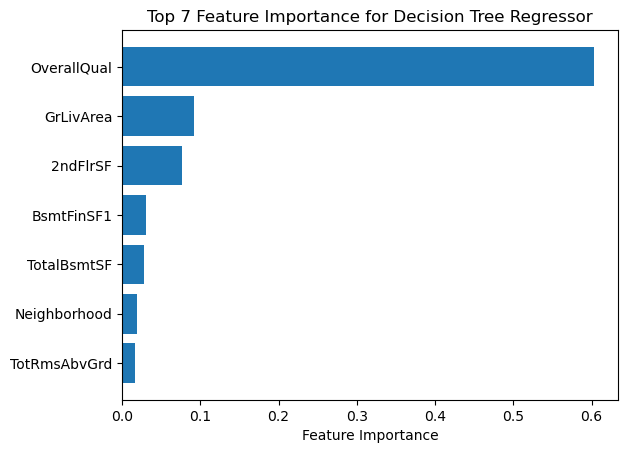

In [54]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train , y_train)
raw_pred = dtree.predict(X_test)

print(f"The accuracy of the raw model is {metrics.r2_score(raw_pred , y_test)}")
print(f"The Mean Square Error of the raw model is {metrics.mean_squared_error(raw_pred , y_test)}")

importances = dtree.feature_importances_
features = train.columns
indices = np.argsort(importances)

top_indices = np.argsort(importances)[-7:]

# Plottng only the top 7 features
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 7 Feature Importance for Decision Tree Regressor')
plt.show()

# Metrics for GridSearchCV

Accuracy for GridSearchCV is 0.739703427849995
MSE for GridSearchCV is 1293816598.8638475


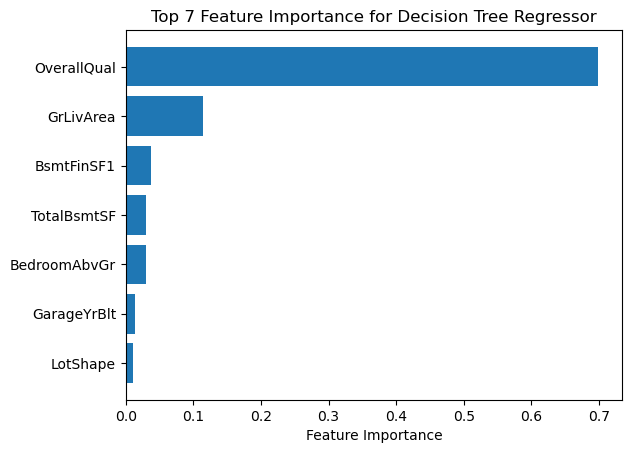

In [25]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth" : (1,3,5,7,9) , "min_samples_split" : (1,2,9,13,17) , "min_samples_leaf" : (1,3,5,7,9)}

reg = GridSearchCV(dtree , params)

reg.fit(X_train , y_train)

grid_pred =  reg.predict(X_test)

print(f"Accuracy for GridSearchCV is {metrics.r2_score(grid_pred , y_test)}")
print(f"MSE for GridSearchCV is {metrics.mean_squared_error(grid_pred , y_test)}")


best_dtree = reg.best_estimator_

importances = best_dtree.feature_importances_
features = train.columns
indices = np.argsort(importances)

top_indices = np.argsort(importances)[-7:]

# Plottng only the top 7 features
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 7 Feature Importance for Decision Tree Regressor')
plt.show()

# Metrics of Bayesian Of Model

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -1.909e+0 | 4.371     | 9.556     | 15.18     |
| 2         | -1.876e+0 | 6.388     | 2.404     | 4.808     |
| 3         | -3.466e+0 | 1.523     | 8.796     | 12.82     |
| 4         | -1.687e+0 | 7.373     | 1.185     | 19.46     |
| 5         | -1.973e+0 | 8.492     | 2.911     | 5.273     |
| 6         | -1.813e+0 | 6.875     | 3.039     | 18.66     |
| 7         | -1.706e+0 | 9.977     | 1.313     | 17.15     |
| 8         | -1.659e+0 | 7.507     | 9.636     | 17.58     |
| 9         | -1.628e+0 | 9.776     | 6.803     | 14.69     |
| 10        | -1.643e+0 | 10.0      | 10.0      | 12.06     |
| 11        | -1.799e+0 | 9.954     | 1.993     | 11.67     |
| 12        | -2.213e+0 | 3.711     | 10.0      | 20.0      |
| 13        | -1.648e+0 | 10.0      | 10.0      | 7.057     |
| 14        | -1.668e+0 | 10.0      | 6.605     | 9.862     |
| 15    

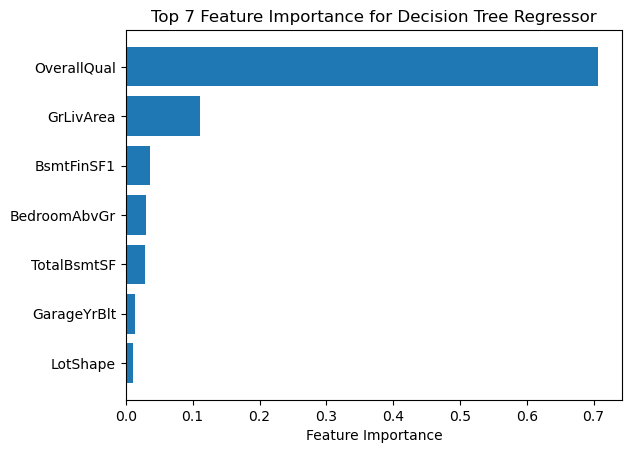

In [22]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization


def objective_function(max_depth, min_samples_split, min_samples_leaf):
    
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)

    
    regressor = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    
    return np.mean(cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))


param_space = {
    'max_depth': (1, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
}


bayesian_SklearnTuner = BayesianOptimization(
    f=objective_function,
    pbounds=param_space,
    random_state=42, 
)


bayesian_SklearnTuner.maximize(init_points=5, n_iter=50)


best_hyperparameters = bayesian_SklearnTuner.max
print("Best hyperparameters:", best_hyperparameters)


best_regressor = DecisionTreeRegressor(
    max_depth=int(best_hyperparameters['params']['max_depth']),
    min_samples_split=int(best_hyperparameters['params']['min_samples_split']),
    min_samples_leaf=int(best_hyperparameters['params']['min_samples_leaf']),
    random_state=42
)

best_regressor.fit(X_train, y_train)

bayes_pred = best_regressor.predict(X_test)

print(metrics.r2_score(bayes_pred , y_test))

print(f"The accuracy of the bayes model is {metrics.r2_score(bayes_pred , y_test)}")
print(f"The Mean Square Error of the bayes model is {metrics.mean_squared_error(bayes_pred , y_test)}")

importances = best_regressor.feature_importances_
features = train.columns
indices = np.argsort(importances)

top_indices = np.argsort(importances)[-7:]

# Plottng only the top 7 features
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 7 Feature Importance for Decision Tree Regressor')
plt.show()

Generation 0 : Best Score : -1805576969.3938155, Avg Score : -1967030864.223922
Generation 1 : Best Score : -1656047011.3221083, Avg Score : -1824236203.1661937
Generation 2 : Best Score : -1656047011.3221083, Avg Score : -1759059756.0139358
Generation 3 : Best Score : -1656047011.3221083, Avg Score : -1734107005.3408132
Generation 4 : Best Score : -1656047011.3221083, Avg Score : -1720705073.4194686
Generation 5 : Best Score : -1638118215.5257094, Avg Score : -1695468607.3287268
Generation 6 : Best Score : -1638118215.5257094, Avg Score : -1685049806.2569232
Generation 7 : Best Score : -1638118215.5257094, Avg Score : -1679329430.0386496
Generation 8 : Best Score : -1638118215.5257094, Avg Score : -1678808600.399841
Generation 9 : Best Score : -1638118215.5257094, Avg Score : -1667400858.5252035
Generation 10 : Best Score : -1638118215.5257094, Avg Score : -1653753045.6224093
Generation 11 : Best Score : -1638118215.5257094, Avg Score : -1652629051.4692435
Generation 12 : Best Score :

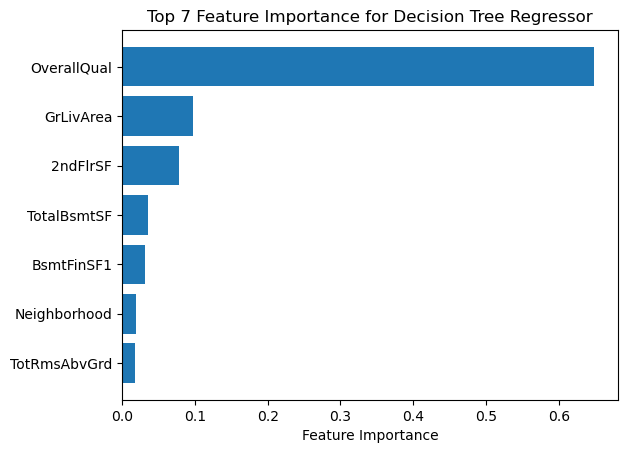

In [15]:
from SklearnTuner import SklearnTuner
param_space = {
    'max_depth': ((1, 10) , int),
    'min_samples_split': ((2, 20) , int),
    'min_samples_leaf': ((1, 10) , int),
}

model = DecisionTreeRegressor()

SklearnTuner = SklearnTuner(X_train,y_train,model=model , model_type="regression" , param_distributions = param_space , max_generation=100 , population=10)

SklearnTuner.search()

best_hyperparams = SklearnTuner.get_best_params()

gen_model = DecisionTreeRegressor(**best_hyperparams)

gen_model.fit(X_train , y_train)

gen_pred = gen_model.predict(X_test)

print(f"The accuracy of the gen model is {metrics.r2_score(gen_pred , y_test)}")
print(f"The Mean Square Error of the gen model is {metrics.mean_squared_error(gen_pred , y_test)}")

importances = gen_model.feature_importances_
features = train.columns
indices = np.argsort(importances)

top_indices = np.argsort(importances)[-7:]

# Plottng only the top 7 features
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 7 Feature Importance for Decision Tree Regressor')
plt.show()

# Metrics of Overfit model

Training acuracy of overfit model is 1.0
The accuracy of the overfit model is 0.516531057508662
The Mean Square Error of the overfit model is 2346454071.0436893


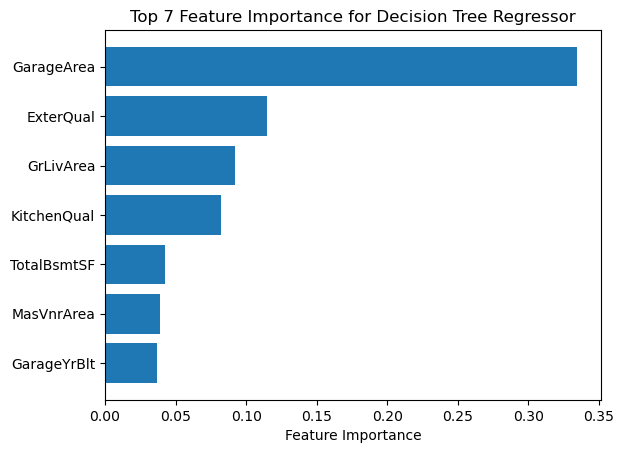

In [215]:
overfit_model = DecisionTreeRegressor(max_depth=None, max_features= , max_leaf_nodes=None , min_samples_split=2)

overfit_model.fit(X_train , y_train)

over_pred = overfit_model.predict(X_test)

print(f"Training acuracy of overfit model is {overfit_model.score(X_train ,y_train)}")
print(f"The accuracy of the overfit model is {metrics.r2_score(over_pred , y_test)}")
print(f"The Mean Square Error of the overfit model is {metrics.mean_squared_error(over_pred , y_test)}")

importances = overfit_model.feature_importances_
features = train.columns
indices = np.argsort(importances)

top_indices = np.argsort(importances)[-7:]

# Plottng only the top 7 features
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 7 Feature Importance for Decision Tree Regressor')
plt.show()

# Tree Plot for raw model

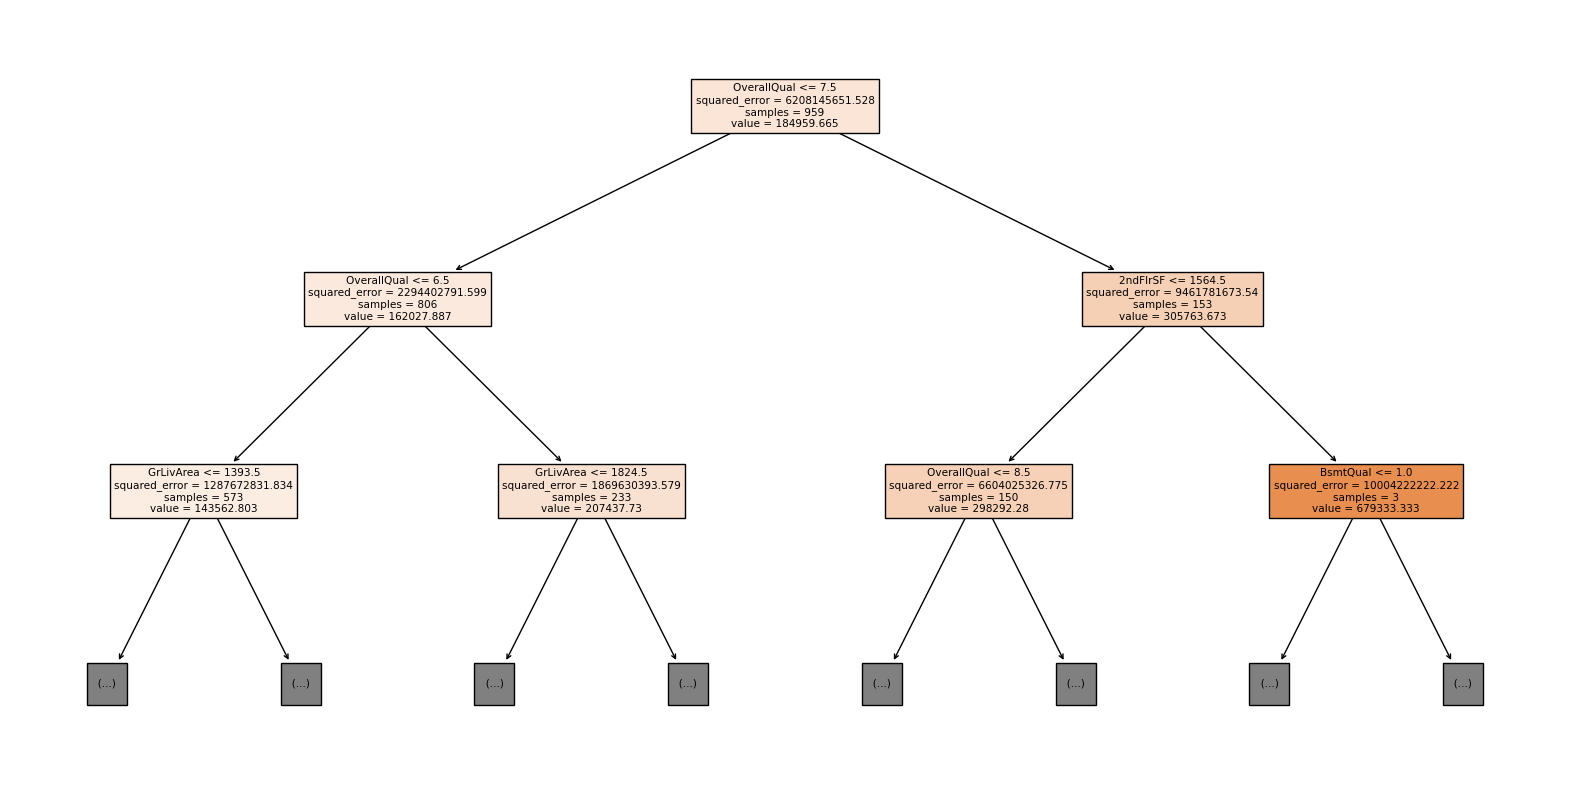

In [216]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, filled=True, feature_names=train.columns ,  max_depth=2)
plt.show()

# Tree plot for GridSearchCV

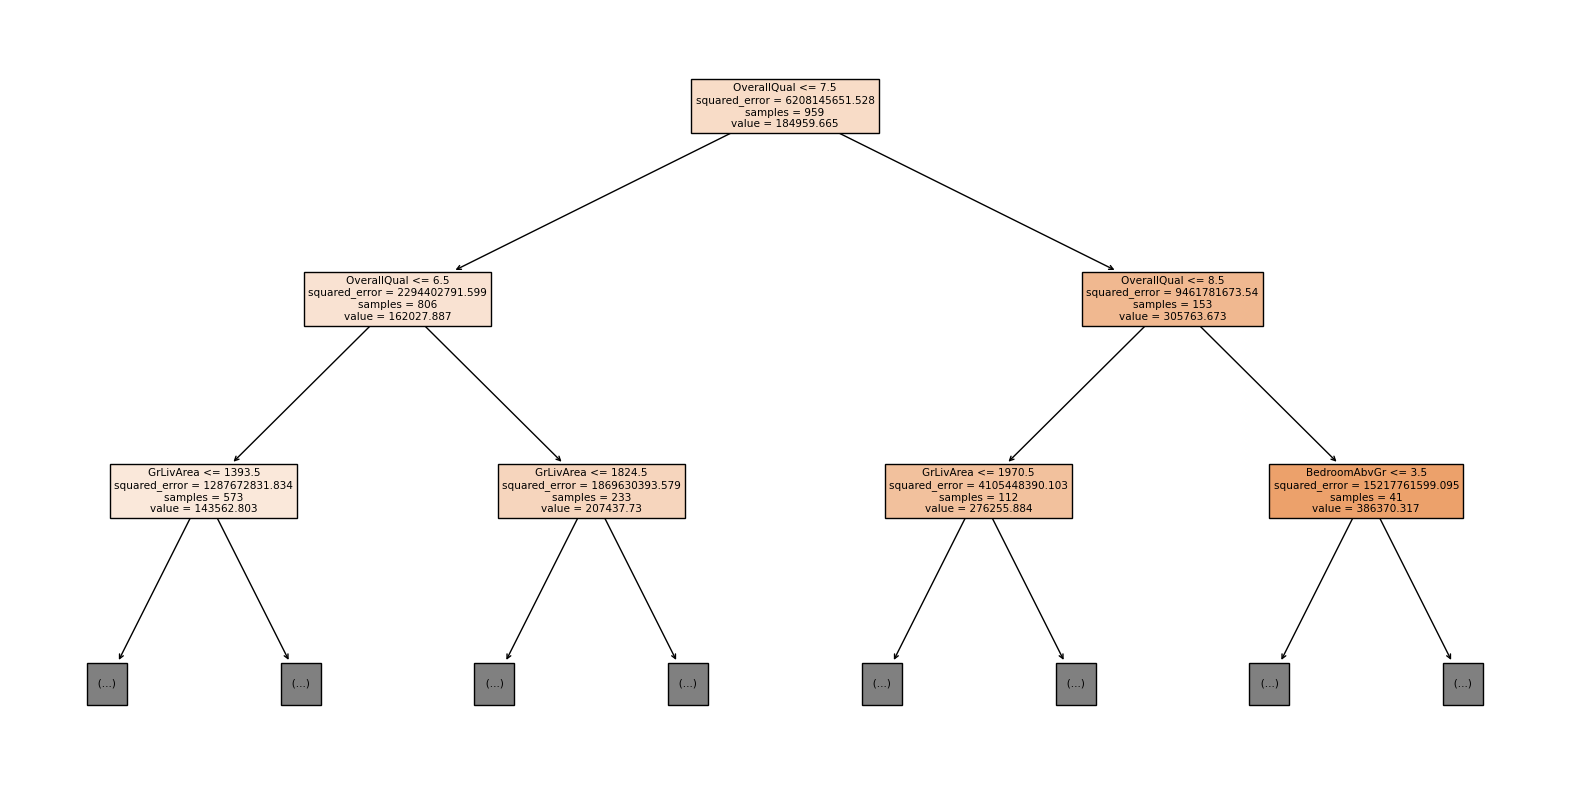

In [217]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dtree ,filled=True, feature_names=train.columns ,  max_depth=2)
plt.show()

# Tree Plot for Bayes model

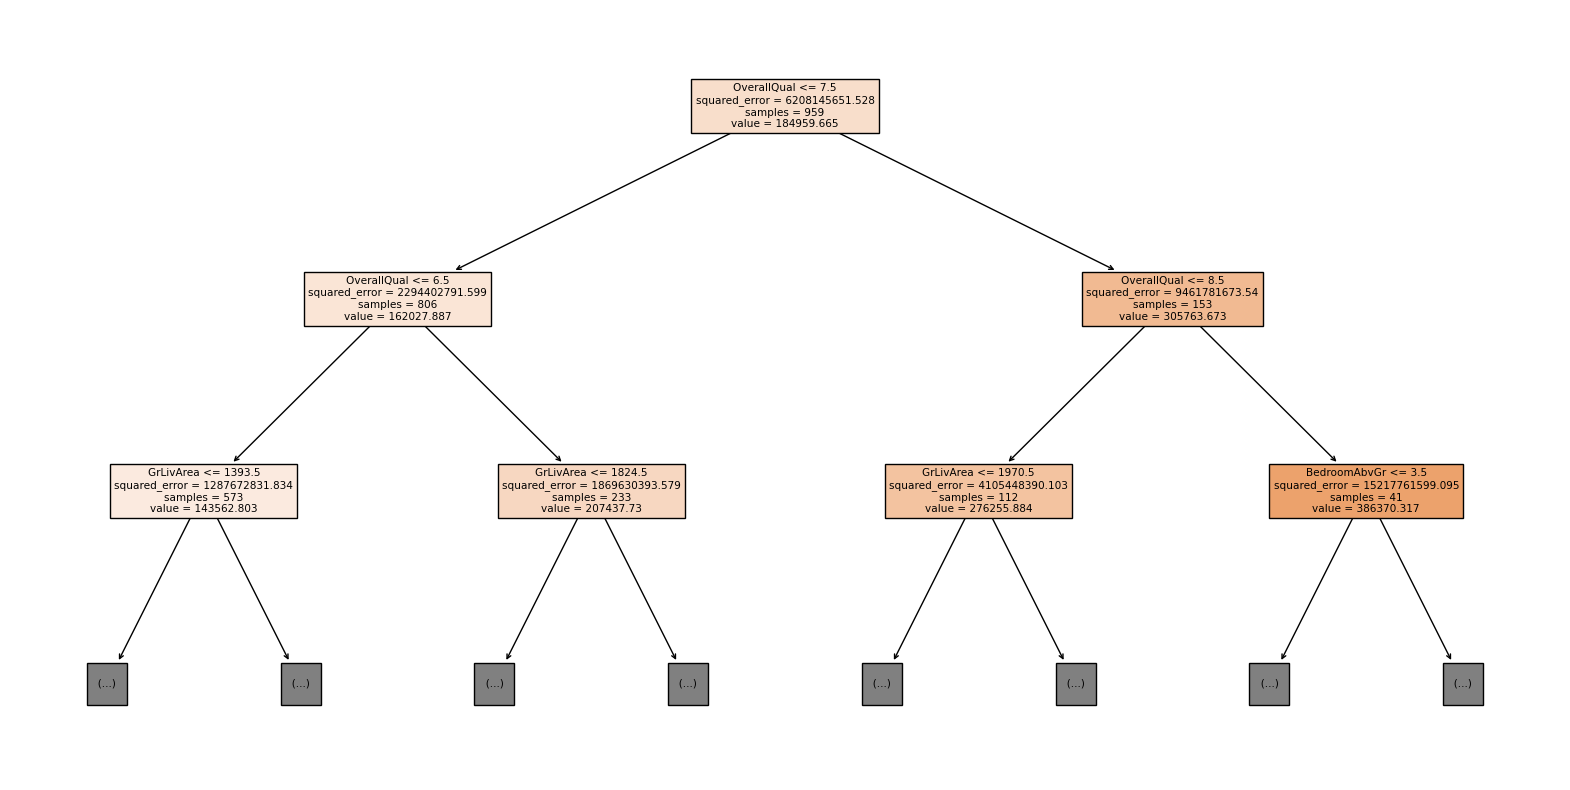

In [218]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_regressor, filled=True, feature_names=train.columns ,  max_depth=2)
plt.show()

# Tree Plot for gen model

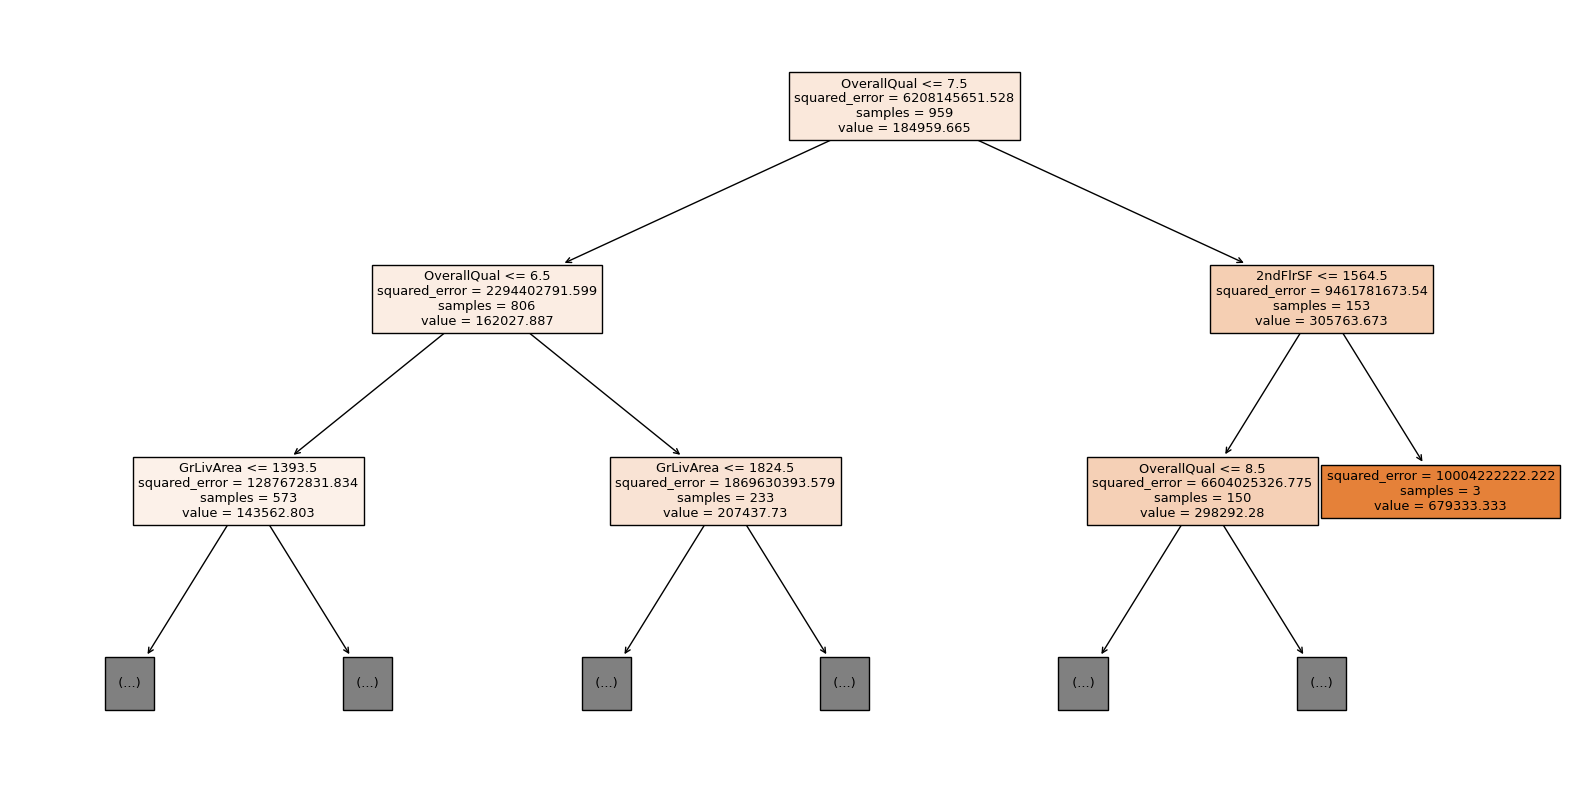

In [219]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(gen_model, filled=True, feature_names=train.columns ,  max_depth=2)
plt.show()

# Tree Plot for Overfit model

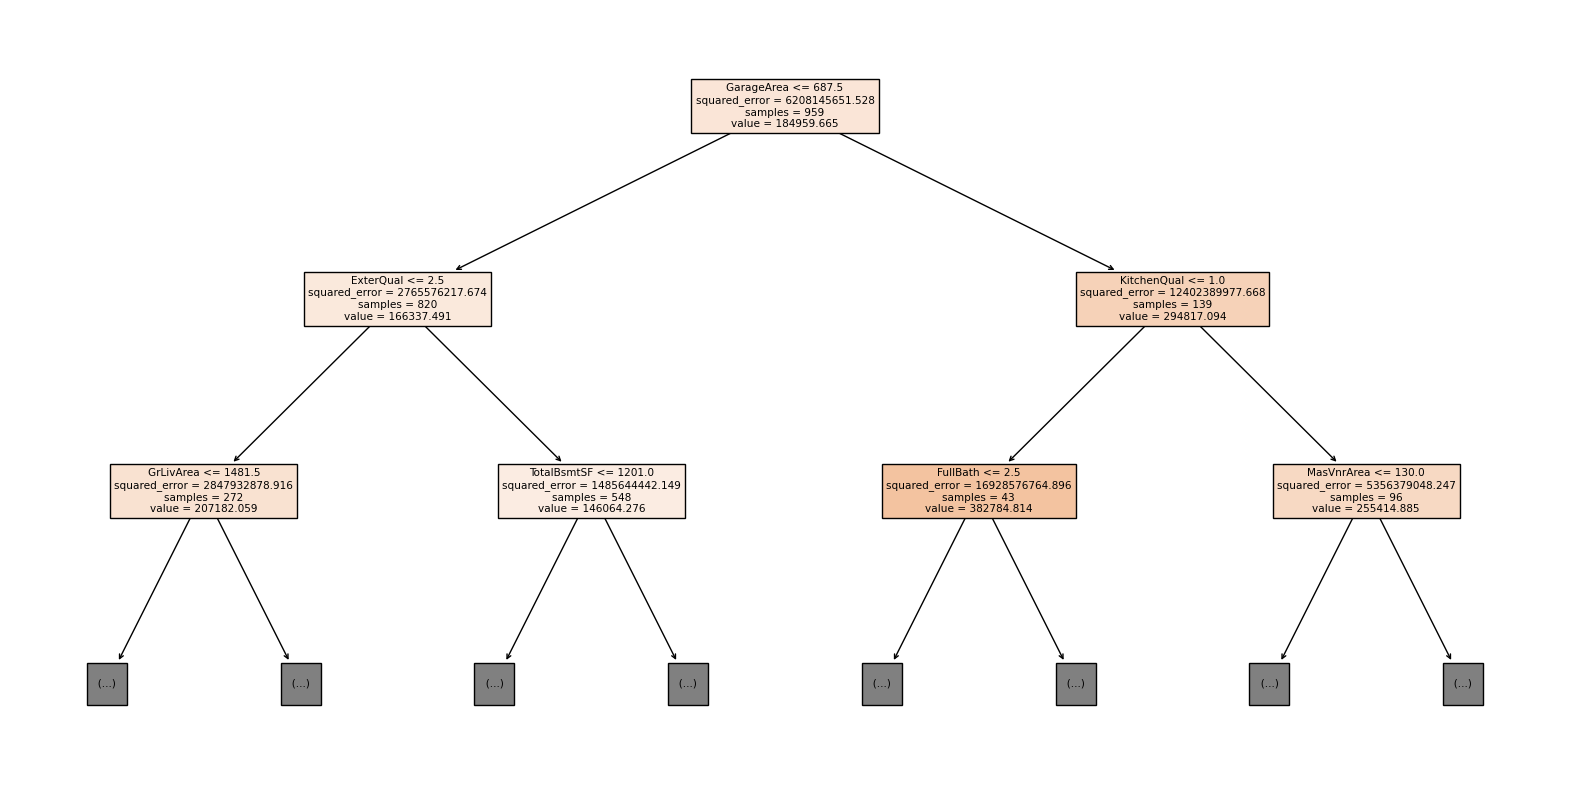

In [220]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(overfit_model, filled=True, feature_names=train.columns ,  max_depth=2)
plt.show()